# Agglomerative clustering

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_completeness_v_measure as clustering_scores
from sklearn.metrics import silhouette_score
%matplotlib inline

## Step 1: Load and plot the data

In [24]:
def make_3Dplot(X, y):
    Xr = PCA(n_components=3).fit_transform(X)

    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)

    ax.scatter(Xr[:, 0], Xr[:, 1], Xr[:, 2], c=y)
    ax.set_title("First three PCA directions")
    ax.set_xlabel("1st eigenvector")
    ax.w_xaxis.set_ticklabels([])
    ax.set_ylabel("2nd eigenvector")
    ax.w_yaxis.set_ticklabels([])
    ax.set_zlabel("3rd eigenvector")
    ax.w_zaxis.set_ticklabels([])

X shape: (1797, 64)
N clusters: 10


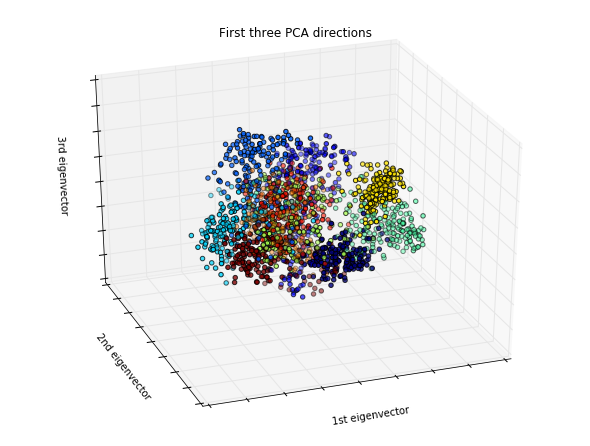

In [42]:
# data = datasets.load_iris()
data = datasets.load_digits()
# data = datasets.fetch_olivetti_faces()
X, y = data.data, data.target
print("X shape: {}".format(X.shape))
print("N clusters: {}".format(len(np.unique(y))))

make_3Dplot(X, y)

## Step 2: Perform agglomerative clustering

Completeness: 0.858
Homogeneity: 0.879
V_measure: 0.868


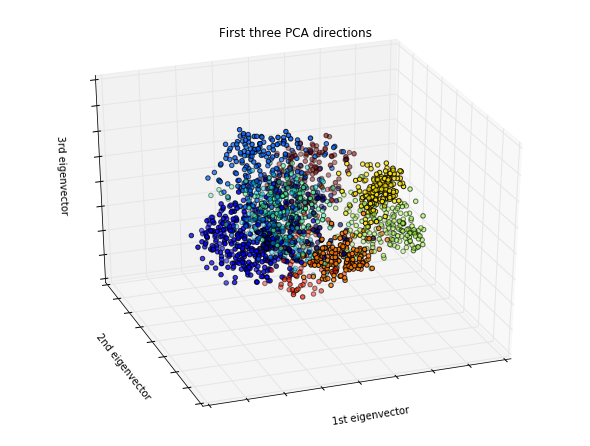

In [43]:
n_clusters = 10
mdl = AgglomerativeClustering(n_clusters=n_clusters)

y_hat = mdl.fit_predict(X)

make_3Dplot(X, y_hat)
print("Completeness: {:.3f}\nHomogeneity: {:.3f}\nV_measure: {:.3f}".format(*clustering_scores(y, y_hat)))

## Step 3: check scores for increasing n_clusters

In [44]:
min_clusters = 2
max_clusters = 20

# Scores containers
completeness = []
homogeneity = []
v_measure = []
silhouette = []

# Computing agglomerative clustering
for n_clusters in range(min_clusters,max_clusters):
    mdl = AgglomerativeClustering(n_clusters=n_clusters)
    y_hat = mdl.fit_predict(X)
    c, h, v = clustering_scores(y, y_hat)
    s = silhouette_score(X, y_hat)
    completeness.append(c)
    homogeneity.append(h)
    v_measure.append(v)
    silhouette.append(s)

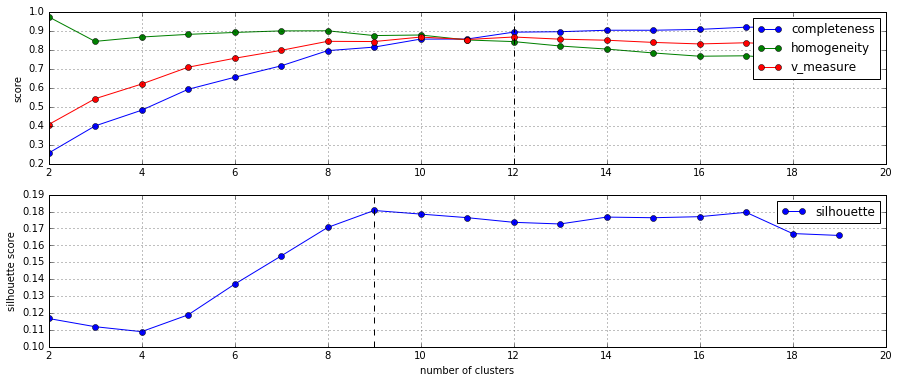

In [45]:
# Plot section
fig = plt.figure(1, figsize=(15, 6))
plt.subplot(2,1,1)
plt.plot(np.arange(min_clusters,max_clusters), completeness, '-o', label='completeness')
plt.plot(np.arange(min_clusters,max_clusters), homogeneity, '-o', label='homogeneity')
plt.plot(np.arange(min_clusters,max_clusters), v_measure, '-o', label='v_measure')
plt.axvline(x=np.argmax(v_measure)+min_clusters, ymin=0, ymax=1, linestyle='--', color='k')
plt.grid('on')
plt.legend()
plt.ylabel('score')

plt.subplot(2,1,2)
plt.plot(np.arange(min_clusters,max_clusters), silhouette, '-o', label='silhouette')
plt.axvline(x=np.argmax(silhouette)+min_clusters, ymin=0, ymax=1, linestyle='--', color='k')
plt.grid('on')
plt.legend()
plt.xlabel('number of clusters')
plt.ylabel('silhouette score');